# Creating a Neural Network to classify diabetic patients

<img src="https://www.ndr.de/diabetes312_v-fullhd.jpg" align="left" width="600">

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Neural_Networks


<h3>The Problem</h3>
<p>Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not. The dataset looks like this:</p>
<table class="table table-striped">
    <thead>
        <tr>
            <th>Person</th>
            <th>Smoking</th>
            <th>Obesity</th>
            <th>Exercise</th>
            <th>Diabetic</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Person 1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>Person 2</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Person 3</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Person 4</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>Person 5</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
            <td>1</td>
        </tr>
    </tbody>
</table>
<p>In this table, there are five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic. It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. Our task is to create a neural network that is able to predict whether an unknown person is diabetic or not given data about his exercise habits, obesity, and smoking habits.</p>

In [2]:
# Function to generate pretty tables
def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

# Activation function (sigmoid)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the activation function
# -> When updating the curve, to know in which 
#    direction and how much to change or update 
#    the curve depending upon the slope.
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
# Create data frame
data = np.array([[0,1,0,1],[0,0,1,0],[1,0,0,0],[1,1,0,1],[1,1,1,1]])
df = pd.DataFrame(data, columns=['Smoking', 'Obesity', 'Exercise', 'Diabetic'])

# Show table
generate_ascii_table(df)

# Matrix with features (X) and labels (y)
X = data[0:5,0:3]
y = data[0:5,3]
y = y.reshape(5,1)

+---------+---------+----------+----------+
| Smoking | Obesity | Exercise | Diabetic |
+---------+---------+----------+----------+
|    0    |    1    |    0     |    1     |
|    0    |    0    |    1     |    0     |
|    1    |    0    |    0     |    0     |
|    1    |    1    |    0     |    1     |
|    1    |    1    |    1     |    1     |
+---------+---------+----------+----------+


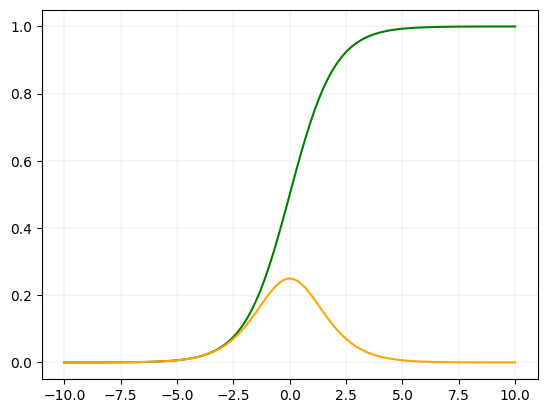

In [4]:
# Plots the sigmoid function and its derivative
input = np.linspace(-10, 10, 100)
plt.plot(input, sigmoid(input), color="green")
plt.plot(input, sigmoid(input)*(1-sigmoid(input)), color="orange")
plt.grid(color='gray', linestyle='-', linewidth=0.1)

In [5]:
# Initialize weights and bias & define learning rate und the number of epochs
np.random.seed(42)
weights        = np.random.rand(3,1)
bias           = np.random.rand(1)
learning_rate  = 0.25
num_epochs     = 200

In [6]:
# Calculations step by step

# Inputs
inputs = X

# Print X, y, weights and bias
print('X:', '\n', inputs, '\n')
print('y:', '\n', y, '\n')
print('weights:', '\n', weights,'\n')
print('bias:', '\n', bias,'\n')

# Calculate X * weigths + bias
XW = np.dot(X, weights) + bias
print('XW:', '\n', XW, '\n')

# Apply activation function to XW
z = sigmoid(XW)
print('sigmoid(XW) = z', '\n', z, '\n')

# Calculate the error (difference between labels and z)
error = z - y
print('error:', '\n', error, '\n')

# Backpropagation (weights and bias adaptation)
dcost_dpred = error
dpred_dz    = sigmoid_der(z)
print('sigmoid_der(z):', '\n', dpred_dz, '\n')

# Calculate
z_delta = dcost_dpred * dpred_dz
print('z_delta:', '\n', z_delta, '\n')

# Adapt weights
inputs = X.T
weights -= learning_rate * np.dot(inputs, z_delta)
print('adapted weights', '\n', weights, '\n')

print('adapted bias:')
for num in z_delta:
    bias -= learning_rate * num
    print(bias)

X: 
 [[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]] 

y: 
 [[1]
 [0]
 [0]
 [1]
 [1]] 

weights: 
 [[0.37454012]
 [0.95071431]
 [0.73199394]] 

bias: 
 [0.59865848] 

XW: 
 [[1.54937279]
 [1.33065243]
 [0.9731986 ]
 [1.92391291]
 [2.65590685]] 

sigmoid(XW) = z 
 [[0.82482312]
 [0.79094853]
 [0.72575659]
 [0.87257414]
 [0.93437412]] 

error: 
 [[-0.17517688]
 [ 0.79094853]
 [ 0.72575659]
 [-0.12742586]
 [-0.06562588]] 

sigmoid_der(z): 
 [[0.21187385]
 [0.21464285]
 [0.21976804]
 [0.20785969]
 [0.20249263]] 

z_delta: 
 [[-0.0371154 ]
 [ 0.16977145]
 [ 0.1594981 ]
 [-0.0264867 ]
 [-0.01328876]] 

adapted weights 
 [[0.34460946]
 [0.96993702]
 [0.69287327]] 

adapted bias:
[0.60793733]
[0.56549447]
[0.52561995]
[0.53224162]
[0.53556381]


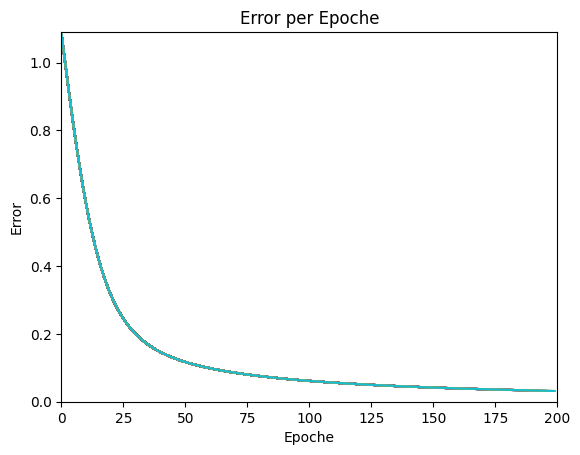

In [7]:
# Neural network

# Prepare figure
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_xlabel('Epoche')
ax.set_ylabel('Error')
plt.title('Error per Epoche')
plt.ion()

fig.show()
fig.canvas.draw()

#--------------------------------------
# Loop with backpropagation
#--------------------------------------

# Initialize list
d = []

for epoch in range(num_epochs):
    
    inputs = X
    
    # Calculate (X * weigths) + bias
    XW = np.dot(X, weights) + bias

    # Apply activation function to XW
    z = sigmoid(XW)

    # Calculate the error (difference between label-value and z)
    error = z - y
    
    # Store error in data frame
    d.append(
        {
            'Epoch': epoch,
            'Error': error.sum()
        }
    )
    df = pd.DataFrame(d)

    # Backpropagation (change weights and bias)
    dcost_dpred = error
    dpred_dz    = sigmoid_der(z)
    z_delta     = dcost_dpred * dpred_dz

    inputs      = X.T
    weights    -= learning_rate * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= learning_rate * num

    #-----------------------
    # Plot error per epoche
    #-----------------------
    plt.xlim([0,num_epochs])
    plt.ylim([0, df.Error[0]])
    ax.plot(df.Epoch, df.Error)
    fig.canvas.draw()

In [8]:
# Model-prediction based on new data
data_new = np.array([[0,1,0]])
df_new   = pd.DataFrame(data_new, columns=['Smoking', 'Obesity', 'Exercise'])

print('New Data (basis for prediction):', '\n')
generate_ascii_table(df_new)

# Calculate probability of having Diabetes
result       = sigmoid(np.dot(data_new, weights) + bias)
print('\n', 'Predicted probability of having Diabetes:', result)

New Data (basis for prediction): 

+---------+---------+----------+
| Smoking | Obesity | Exercise |
+---------+---------+----------+
|    0    |    1    |    0     |
+---------+---------+----------+

 Predicted probability of having Diabetes: [[0.95602528]]


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-03 09:22:19
Python Version: 3.11.14
-----------------------------------
